# Train Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#reading in train data, 'train.csv' is in the same folder as the code
diamonds = pd.read_csv("train.csv",index_col = False)

diamonds.describe()

,id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,26917.653759,0.798932,61.748204,57.460424,3941.097771,5.733521,5.737262,3.540254
std,15571.781613,0.474625,1.437577,2.240229,3994.212849,1.122802,1.150102,0.708694
min,1.000000,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,13415.750000,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,26882.500000,0.700000,61.800000,57.000000,2411.000000,5.700000,5.710000,3.530000
75%,40437.250000,1.040000,62.500000,59.000000,5335.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


C:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


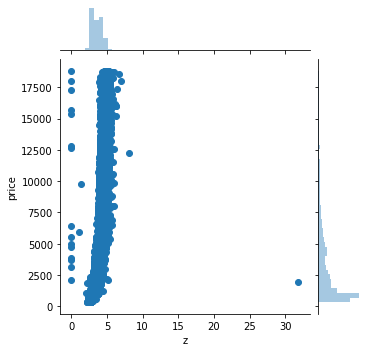

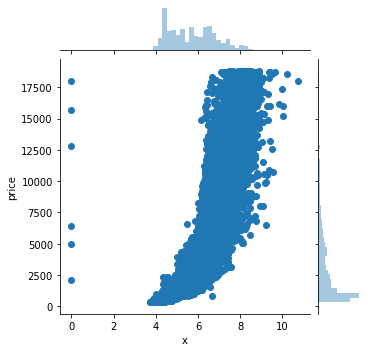

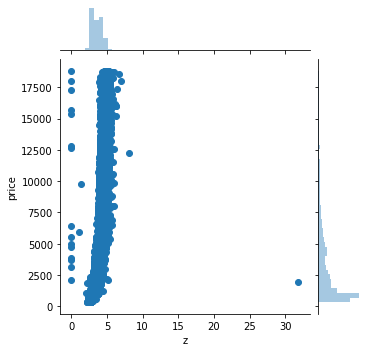

In [3]:
#plotting to check for outliers
sns.jointplot(x='z' , y='price' , data=diamonds , size=5)
sns.jointplot(x='x' , y='price' , data=diamonds , size=5)
sns.jointplot(x='z' , y='price' , data=diamonds , size=5)

In [4]:
#removing items with x,y,z values of 0
zero_df = diamonds[(diamonds['x'] == 0) |
           (diamonds['y'] == 0) |
           (diamonds['z'] == 0)]
diamonds.drop(zero_df.index, inplace = True)

#removing items with outlier data
cond = (diamonds['y'] > 20) | (diamonds['z'] > 20) | (diamonds['z'] < 2)
diamonds.drop(diamonds[cond].index, inplace = True)

#checking train data
diamonds.describe()

,id,carat,depth,table,price,x,y,z
count,43132.000000,43132.000000,43132.000000,43132.000000,43132.000000,43132.000000,43132.000000,43132.000000
mean,26919.598743,0.798639,61.748451,57.460088,3938.822661,5.733857,5.735663,3.540795
std,15572.371442,0.474347,1.437327,2.239881,3991.807536,1.120536,1.112353,0.691973
min,1.000000,0.200000,43.000000,44.000000,326.000000,3.730000,3.710000,2.060000
25%,13415.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26886.500000,0.700000,61.800000,57.000000,2409.000000,5.700000,5.710000,3.530000
75%,40439.500000,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


In [5]:
#changing categorical data into numerical data with order
cut = pd.Categorical(diamonds['cut'], categories=['Fair','Good','Very Good','Premium','Ideal'], ordered=True)
labels_cut, unique = pd.factorize(cut, sort=True)
diamonds['cut'] = labels_cut

color = pd.Categorical(diamonds['color'], categories=['J','I','H','G','F','E','D'], ordered=True)
labels_color, unique = pd.factorize(color, sort=True)
diamonds['color'] = labels_color

clarity = pd.Categorical(diamonds['clarity'], categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], ordered=True)
labels_clarity, unique = pd.factorize(clarity, sort=True)
diamonds['clarity'] = labels_clarity

In [6]:
#checking data
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,27454,1.70,2,5,3,58.6,60.0,18107,7.91,7.82,4.61
1,38353,0.47,2,4,2,61.1,61.0,1021,4.97,5.01,3.05
2,2675,0.70,1,6,4,57.8,60.0,3239,5.85,5.87,3.39
3,15280,1.50,3,1,1,62.9,57.0,6132,7.28,7.26,4.57
4,49324,0.51,4,4,5,62.2,56.0,2093,5.08,5.12,3.17


# Test Data Preprocessing

In [7]:
#reading in test data, 'test.csv' is in the same folder as the code
diamonds_submission = pd.read_csv("test.csv",index_col = False)

diamonds_submission.describe()

,id,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,27181.884965,0.793969,61.754208,57.444225,5.721702,5.723581,3.532652
std,15568.206642,0.471550,1.412679,2.211442,1.117586,1.109677,0.693588
min,6.000000,0.200000,53.300000,43.000000,0.000000,0.000000,0.000000
25%,13733.750000,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,27359.500000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,40515.250000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000
max,53938.000000,4.010000,73.600000,73.000000,10.140000,10.100000,6.380000


In [8]:
#replacing x,y,z values of 0 with mean data from columns in train data
diamonds_submission['x'] = diamonds_submission['x'].replace(0, diamonds['x'].mean())
diamonds_submission['y'] = diamonds_submission['y'].replace(0, diamonds['y'].mean())
diamonds_submission['z'] = diamonds_submission['z'].replace(0, diamonds['z'].mean())

In [9]:
#changing categorical data into numerical data with order
cut = pd.Categorical(diamonds_submission['cut'], categories=['Fair','Good','Very Good','Premium','Ideal'], ordered=True)
labels_cut, unique = pd.factorize(cut, sort=True)
diamonds_submission['cut'] = labels_cut

color = pd.Categorical(diamonds_submission['color'], categories=['J','I','H','G','F','E','D'], ordered=True)
labels_color, unique = pd.factorize(color, sort=True)
diamonds_submission['color'] = labels_color

clarity = pd.Categorical(diamonds_submission['clarity'], categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], ordered=True)
labels_clarity, unique = pd.factorize(clarity, sort=True)
diamonds_submission['clarity'] = labels_clarity

In [10]:
#checking data
diamonds_submission.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,6735,0.31,2,2,5,61.2,55.0,4.41,4.44,2.70
1,48105,0.50,3,3,5,61.6,60.0,5.13,5.10,3.15
2,49587,0.58,4,3,5,61.6,56.0,5.37,5.40,3.31
3,6209,1.01,3,2,1,59.4,59.0,6.53,6.56,3.89
4,22723,1.56,4,2,2,62.1,56.0,7.44,7.46,4.63


In [11]:
#dropping columns that are not needed and splitting train data to train set and test set
diamonds_submission = diamonds_submission.drop('id', axis=1)
X = diamonds.drop(['price', 'id'],axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
#normalizing data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
diamonds_submission = ss.transform(diamonds_submission)

# Modelling

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
#tuning hyperparameters for RandomForestRegressor with GridSearchCV
rfr_params = {
    'n_estimators':[20,40,60,80,100], 
    'n_jobs':[-1],
    'max_features':['auto','sqrt','log2']
}

rfr_GridSearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rfr_params,scoring='r2')
rfr_GridSearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [23]:
#obtaining best parameters for RandomForestRegressor
rfr_GridSearch.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#initializing XGBRegressor
xg = xgboost.XGBRegressor()

In [ ]:
#setting up hyperparamter grid for RandomSearchCV
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25, 0.5, 0.75, 1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg, 
                              param_distributions=hyperparameter_grid,
                              cv=5, n_iter=50,
                              scoring='neg_mean_absolute_error', n_jobs = 4,
                              verbose=5,
                              return_train_score = True,
                              random_state = 42)

In [ ]:
random_cv.fit(X_train, y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
#taking the best parameters from RandomSearchCV and then do a detailed search for better parameters using GridSearchCV
xgtrial = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

n_estimators = [50, 100, 200, 300]
max_depth = [8, 9 , 10, 12]
base_score = [0.25, 0.4, 0.5]

gridSearch_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'base_score': base_score
}

xgtrial_GridSearch = GridSearchCV(estimator=xgtrial, param_grid=gridSearch_grid,scoring='r2')
xgtrial_GridSearch.fit(X_train,y_train)

In [ ]:
#obtaining best parameters for XGBRegressor
xgtrial_GridSearch.best_estimator_

### Stacking Regressors

In [31]:
from sklearn.ensemble import StackingRegressor
#stacking various regressors to combine the their strengths 
def get_stacking():
    level0 = list()
    level0.append(('krr', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('dtr', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)))
    level0.append(('xgb', xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)))
    level0.append(('svm', SVR()))
    level1 = LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [32]:
stacking = get_stacking()

In [33]:
#fitting model to train data
stacking.fit(X_train, y_train)

[15:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=5,
                  estimators=[('krr',
                               KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                           gamma=None, kernel='polynomial',
                                           kernel_params=None)),
                              ('knn',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                              ('dtr',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=N...
        

In [34]:
#evaluating model with split test data
predictions = stacking.predict(X_test)
print(f"R2 score: {metrics.explained_variance_score(y_test,predictions)}")

R2 score: 0.9847535363378247


# Submission

In [35]:
#predicting price for test data
diamonds_submission_pred = stacking.predict(diamonds_submission)
diamonds_submission_pred

array([ 638.03727789, 1870.8941278 , 2154.64732714, ..., 3378.71320656,
       3035.27021263,  681.93953128])

In [36]:
price_submission = pd.read_csv("submission_sample.csv",index_col = False)

In [37]:
price_submission['price'] = diamonds_submission_pred
price_submission.head()

,id,price
0,6735,638.037278
1,48105,1870.894128
2,49587,2154.647327
3,6209,4010.112867
4,22723,10393.694578


In [38]:
price_submission.to_csv("submission14.csv", index=False)

In [40]:
import pickle
filename = 'stacked_model.sav'
pickle.dump(stacking, open(filename, 'wb'))